In [29]:
import seaborn as sns

In [54]:
!mkdir nps-images

In [70]:
%%file presentation.mplstyle
axes.titlesize : 20
axes.labelsize : 14
lines.linewidth : 2
lines.markersize : 10
xtick.labelsize : 13
ytick.labelsize : 13

Overwriting presentation.mplstyle


In [71]:
from rms_weather_plots import get_data
from common import run_labels
import matplotlib.pyplot as plt

plt.style.use('presentation.mplstyle')



def savefig(name):
    plt.savefig(f"nps-images/{name}")

In [76]:
data = get_data()
df = data.to_dataframe().rename(index=run_labels).reset_index()
df = df[df.time < 109]
df = df.rename(columns={'concat_dim': 'Run'})

In [77]:
df.head()

,Run,time,y,U,V,SLI,QT,layer_mass,VORT
0,NN-Lower,100.625,Extratropics,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,NN-Lower,100.625,Subtropics,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,NN-Lower,100.625,Tropics,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,NN-Lower,100.750,Extratropics,1.225076,1.189932,0.307828,0.158210,0.0,0.000008
4,NN-Lower,100.750,Subtropics,0.751290,0.906440,0.226032,0.180358,0.0,0.000005


In [80]:
def plot_field(field, unit=""):

    sns.FacetGrid(df, hue="Run", col="y")\
    .map(plt.plot, "time", field)\
    .add_legend()\
    .set_ylabels(f"{field} ({unit})")
    
    savefig(f"rms-{field}.pdf")


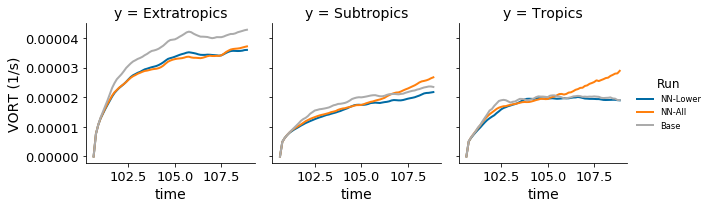

In [81]:
plot_field("VORT", "1/s")

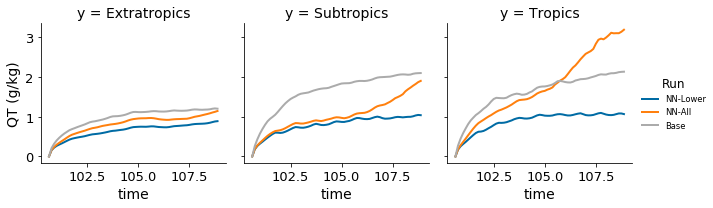

In [82]:
plot_field("QT", "g/kg")

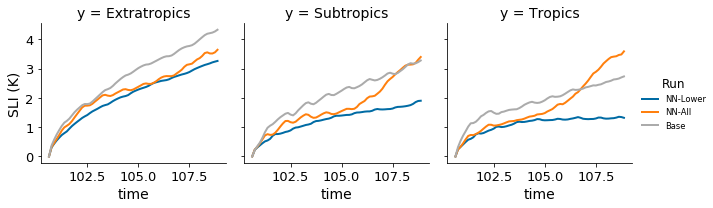

In [83]:
plot_field("SLI", "K")

In [84]:
from src.data import runs

In [87]:
PW = runs['debias'].data_2d.PW

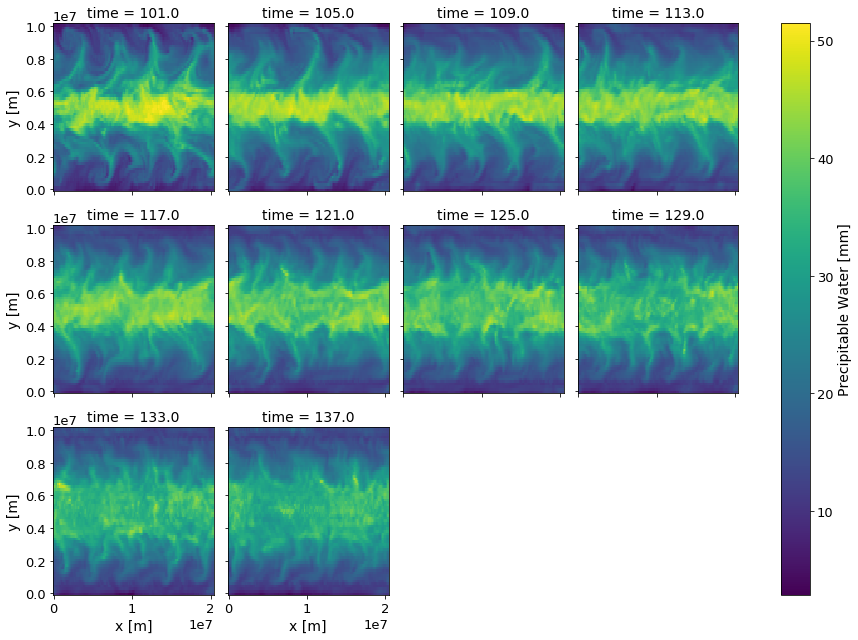

In [95]:
PW.sel(time=slice(101, 140, 4*24)).plot(col='time', col_wrap=4)